## 01 - DATA EXPLORATION

###### Lecture explaining xarray functionalities geospatial processing : datacubes_data_handling.ipynb

#### 01.1 - Libraries import

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import fiona
import numpy as np

#### 01.2 - Data exploration

In [4]:
# Open the file NetCDF
dataset1 = xr.open_dataset(r"..\..\data\data_downloads\era5-downscaled-over-italy_hourly_437292.nc")
dataset2 = xr.open_dataset(r"..\..\data\data_downloads\air_temperature_era5-downscaled-over-italy_hourly_442373.nc")

In [3]:
dataset1

<xarray.Dataset>
Dimensions:                         (time: 23736, rlat: 90, rlon: 74, bnds: 2)
Coordinates:
  * rlon                            (rlon) float64 -2.473 -2.453 ... -1.013
    height_2m                       float32 ...
    lon                             (rlat, rlon) float32 ...
  * rlat                            (rlat) float64 1.812 1.832 ... 3.572 3.592
    lat                             (rlat, rlon) float32 ...
  * time                            (time) datetime64[ns] 1981-06-01T11:00:00...
Dimensions without coordinates: bnds
Data variables:
    TMAX_2M                         (time, rlat, rlon) float32 ...
    crs_rotated_latitude_longitude  int64 ...
    time_bnds                       (time, bnds) datetime64[ns] ...
    TD_2M                           (time, rlat, rlon) float32 ...
Attributes: (12/14)
    CDI:             Climate Data Interface version 1.9.8 (https://mpimet.mpg...
    Conventions:     CF-1.4
    history:         Generated by CMCC DDS version 0.9.0 2024-11-03 10:32:28....
    source:          COSMO
    institution:     CMCC (Euro-Mediterranean Center on Climate Change), REMH...
    title:           cclm-sp_2.4_terra_urb_2.3.1 simulation (0.02 Deg) forced...
    ...              ...
    conventionsURL:  http://www.cfconventions.org/
    contact:         Mario Raffa (mario.raffa@cmcc.it)- Marianna Adinolfi (ma...
    references:      http//www.clm-community.eu, http://www.cmcc.it
    creation_date:   2022-10-22 00:28:52
    grid_mapping:    rotated_pole
    CDO:             Climate Data Operators version 1.9.8 (https://mpimet.mpg...

In [4]:
dataset2

<xarray.Dataset>
Dimensions:                         (time: 23736, rlat: 90, rlon: 74, bnds: 2)
Coordinates:
    height_2m                       float32 ...
  * rlat                            (rlat) float64 1.812 1.832 ... 3.572 3.592
  * rlon                            (rlon) float64 -2.473 -2.453 ... -1.013
    lon                             (rlat, rlon) float32 ...
    lat                             (rlat, rlon) float32 ...
  * time                            (time) datetime64[ns] 1981-06-01T11:00:00...
Dimensions without coordinates: bnds
Data variables:
    T_2M                            (time, rlat, rlon) float32 ...
    crs_rotated_latitude_longitude  int64 ...
    time_bnds                       (time, bnds) datetime64[ns] ...
Attributes: (12/14)
    CDI:             Climate Data Interface version 1.9.8 (https://mpimet.mpg...
    Conventions:     CF-1.4
    history:         Generated by CMCC DDS version 0.9.0 2024-11-08 08:36:58....
    source:          COSMO
    institution:     CMCC (Euro-Mediterranean Center on Climate Change), REMH...
    title:           cclm-sp_2.4_terra_urb_2.3.1 simulation (0.02 Deg) forced...
    ...              ...
    conventionsURL:  http://www.cfconventions.org/
    contact:         Mario Raffa (mario.raffa@cmcc.it)- Marianna Adinolfi (ma...
    references:      http//www.clm-community.eu, http://www.cmcc.it
    creation_date:   2022-10-22 00:28:52
    grid_mapping:    rotated_pole
    CDO:             Climate Data Operators version 1.9.8 (https://mpimet.mpg...

In [5]:
# Comparison among the two datasets
if dataset1.equals(dataset2):
    print("The datasets are the same!")
else:
    print("The datasets are different!")

I dataset sono diversi!


In [6]:
# Elenco le variabili del dataset
print(dataset1.data_vars)

Data variables:
    TMAX_2M                         (time, rlat, rlon) float32 ...
    crs_rotated_latitude_longitude  int64 ...
    time_bnds                       (time, bnds) datetime64[ns] ...
    TD_2M                           (time, rlat, rlon) float32 ...


In [7]:
print(dataset2.data_vars)

Data variables:
    T_2M                            (time, rlat, rlon) float32 ...
    crs_rotated_latitude_longitude  int64 ...
    time_bnds                       (time, bnds) datetime64[ns] ...


#### Recap dei datasets and their contents
##### Dataset 1 
TMAX_2M :   2m maximum temperature

TD_2M   :   2m dew point temperature
##### Dataset 2 
T_2M    :   2m temperature

In [8]:
# Visualizzo informazioni dettagliate sulla variabile di temperatura
print(dataset1['TD_2M'])

<xarray.DataArray 'TD_2M' (time: 23736, rlat: 90, rlon: 74)>
[158081760 values with dtype=float32]
Coordinates:
  * rlon       (rlon) float64 -2.473 -2.453 -2.433 ... -1.053 -1.033 -1.013
    height_2m  float32 ...
    lon        (rlat, rlon) float32 ...
  * rlat       (rlat) float64 1.812 1.832 1.852 1.872 ... 3.552 3.572 3.592
    lat        (rlat, rlon) float32 ...
  * time       (time) datetime64[ns] 1981-06-01T11:00:00 ... 2023-08-31T16:00:00
Attributes:
    standard_name:  dew_point_temperature
    long_name:      2m dew point temperature
    units:          K
    grid_mapping:   crs_rotated_latitude_longitude


#### 01.3 - Plot spaziale dei dati

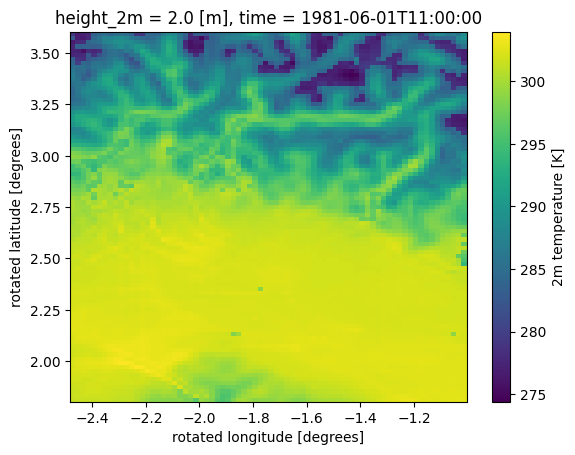

In [9]:
# Funzione plot() integrata in xarray per visualizzare facilmente i dati
dataset2['T_2M'].isel(time=0).plot()

In [4]:
dataset3 = xr.open_dataset(r"C:\Users\andre\Downloads\era5-downscaled-over-italy_hourly_22230.nc")
print(dataset3.data_vars)

Data variables:
    V_10M                           (time, rlat, rlon) float32 ...
    crs_rotated_latitude_longitude  int64 ...


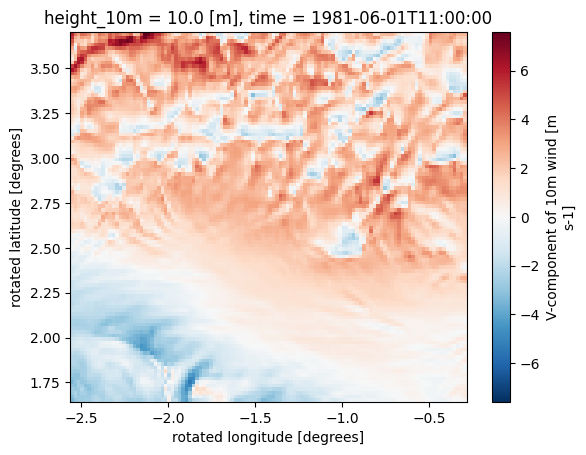

In [6]:
dataset3['V_10M'].isel(time=0).plot()

#### 01.4 - Histogrammi di visualizzazione medie

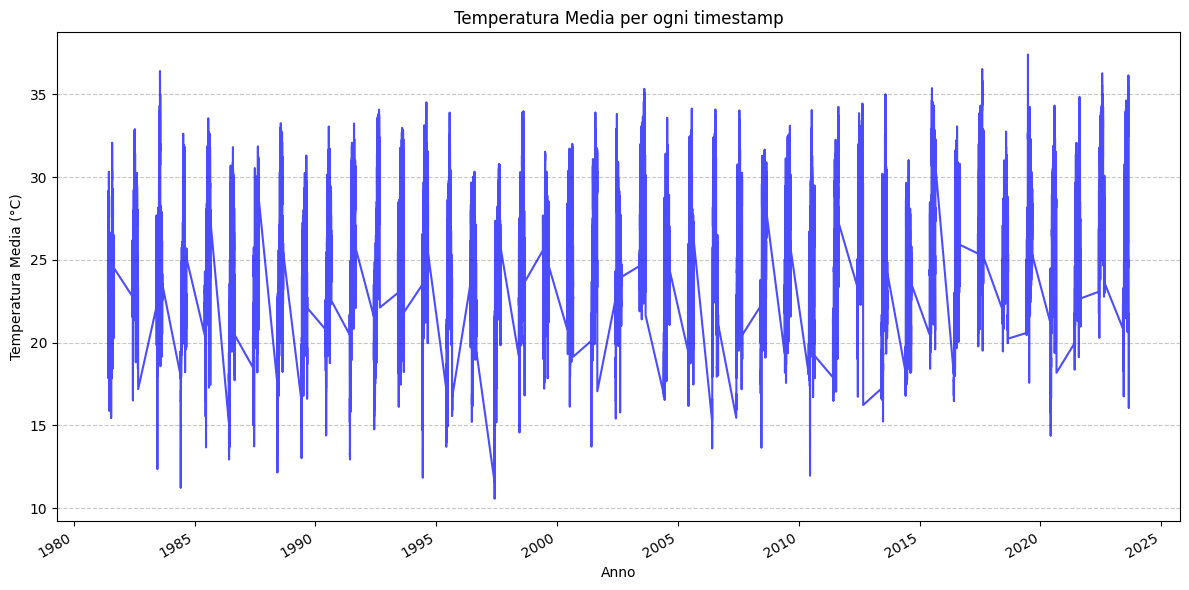

In [10]:
# Set up for the mean temperature histogram
# Calcola la media spaziale per ogni timestamp lungo le dimensioni 'rlat' e 'rlon' 
temperature_mean_over_space = dataset2['T_2M'].mean(dim=['rlat', 'rlon'])

# Converti la temperatura in gradi Celsius
temperature_mean_over_space_celsius = temperature_mean_over_space - 273.15

# Crea un grafico per visualizzare la media di temperatura nel tempo (con line plot e riducendo il numero di punti per migliorare la leggibilità)
plt.figure(figsize=(12, 6))
temperature_mean_over_space_celsius.plot.line(color='b', alpha=0.7)
plt.xlabel("Anno")
plt.ylabel("Temperatura Media (°C)")
plt.title("Temperatura Media per ogni timestamp")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

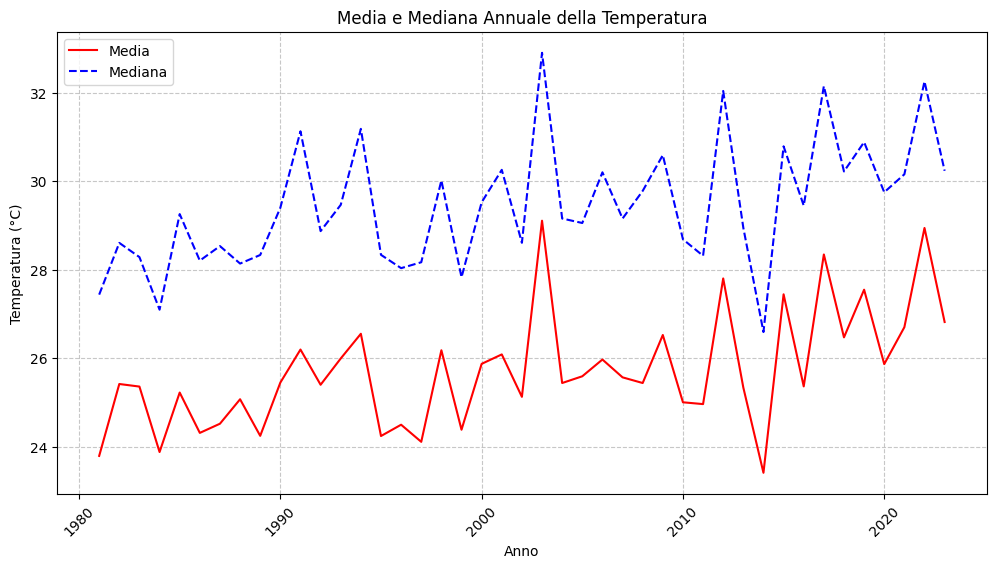

In [11]:
# Calcola la media spaziale per ogni timestamp lungo le dimensioni 'rlat' e 'rlon'
temperature_mean_over_space = (dataset2['T_2M'].mean(dim=['rlat', 'rlon'])) - 273.15
temperature_median_over_space = (dataset2['T_2M'].median(dim=['rlat', 'rlon'])) - 273.15

# Converte i risultati in un DataFrame per facilitarne la manipolazione
temperature_df = temperature_mean_over_space.to_dataframe().reset_index()
temperature_df['T_2M_median'] = temperature_median_over_space.values  # Aggiunge la mediana

# Crea una colonna 'year' che contiene solo l'anno di ogni timestamp
temperature_df['year'] = temperature_df['time'].dt.year

# Calcola la media e la mediana di temperatura per ciascun anno
annual_temperature_mean = temperature_df.groupby('year')['T_2M'].mean()
annual_temperature_median = temperature_df.groupby('year')['T_2M_median'].median()

# Crea un grafico a linea per la media e la mediana annuale della temperatura
plt.figure(figsize=(12, 6))
plt.plot(annual_temperature_mean.index, annual_temperature_mean.values, linestyle='-', color='r', label="Media")
plt.plot(annual_temperature_median.index, annual_temperature_median.values, linestyle='--', color='b', label="Mediana")

plt.xlabel("Anno")
plt.ylabel("Temperatura (°C)")
plt.title("Media e Mediana Annuale della Temperatura")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Ruota le etichette degli anni sull'asse x per renderle più leggibili
plt.show()

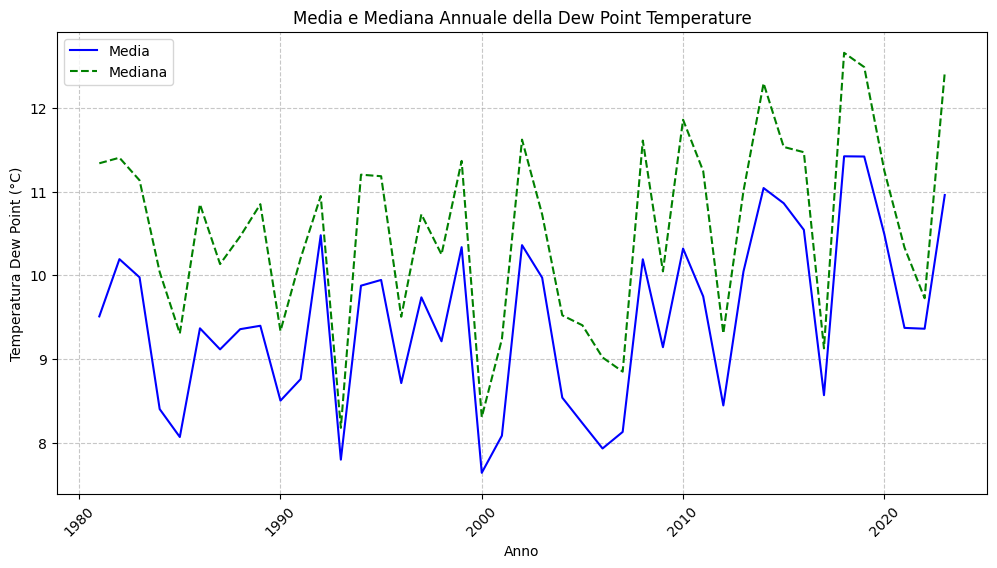

In [12]:
# Calcola la media e la mediana spaziale per ogni timestamp lungo le dimensioni 'rlat' e 'rlon'
dewpoint_mean_over_space = (dataset1['TD_2M'].mean(dim=['rlat', 'rlon'])) - 273.15
dewpoint_median_over_space = (dataset1['TD_2M'].median(dim=['rlat', 'rlon'])) - 273.15

# Converte i risultati in un DataFrame per facilitarne la manipolazione
dewpoint_df = dewpoint_mean_over_space.to_dataframe().reset_index()
dewpoint_df['TD_2M_median'] = dewpoint_median_over_space.values  # Aggiunge la mediana

# Crea una colonna 'year' che contiene solo l'anno di ogni timestamp
dewpoint_df['year'] = dewpoint_df['time'].dt.year

# Calcola la media e la mediana della temperatura di dew point per ciascun anno
annual_dewpoint_mean = dewpoint_df.groupby('year')['TD_2M'].mean()
annual_dewpoint_median = dewpoint_df.groupby('year')['TD_2M_median'].median()

# Crea un grafico a linea per la media e la mediana annuale della dew point temperature
plt.figure(figsize=(12, 6))
plt.plot(annual_dewpoint_mean.index, annual_dewpoint_mean.values, linestyle='-', color='b', label="Media")
plt.plot(annual_dewpoint_median.index, annual_dewpoint_median.values, linestyle='--', color='g', label="Mediana")

plt.xlabel("Anno")
plt.ylabel("Temperatura Dew Point (°C)")
plt.title("Media e Mediana Annuale della Dew Point Temperature")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Ruota le etichette degli anni sull'asse x per renderle più leggibili
plt.show()

#### 01.5 - Plot di visualizzazione media

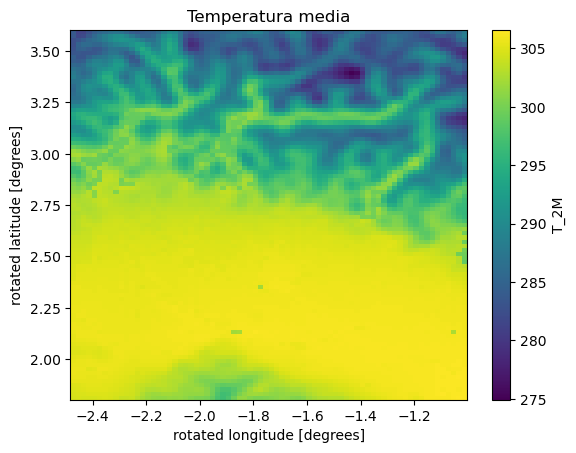

In [21]:
# Seleziona la variabile di temperatura (assumendo che si chiami 'air_temperature')
temperature = dataset2['T_2M']

# Calcola la temperatura media sull'intervallo di tempo (se applicabile)
temperature_mean = temperature.mean(dim='time')

# Plotta la temperatura media
temperature_mean.plot() # Xarray has embedded the matplotlib function plot
plt.title("Temperatura media")
plt.show()

#### 01.6 - Deeper understanding of days with sweltering heat

Valori massimi e minimi di Humidex (°C) per ciascun giorno dell'anno:
         time  humidex_mohammad_max  humidex_mohammad_min  \
0  2017-06-01             39.620880             -2.084137   
1  2017-06-02             37.602386             -2.392548   
2  2017-06-03             39.413879             -1.150604   
3  2017-06-04             37.031616             -4.155182   
4  2017-06-05             37.859070             -4.103302   
..        ...                   ...                   ...   
87 2017-08-27             43.917908              5.968414   
88 2017-08-28             41.588654              3.048401   
89 2017-08-29             41.403503              4.833862   
90 2017-08-30             42.673309              5.825562   
91 2017-08-31             39.962646              1.485535   

    humidex_masterson_max  humidex_masterson_min  
0               39.620514              -2.083862  
1               37.602112              -2.392334  
2               39.413605              -1.15

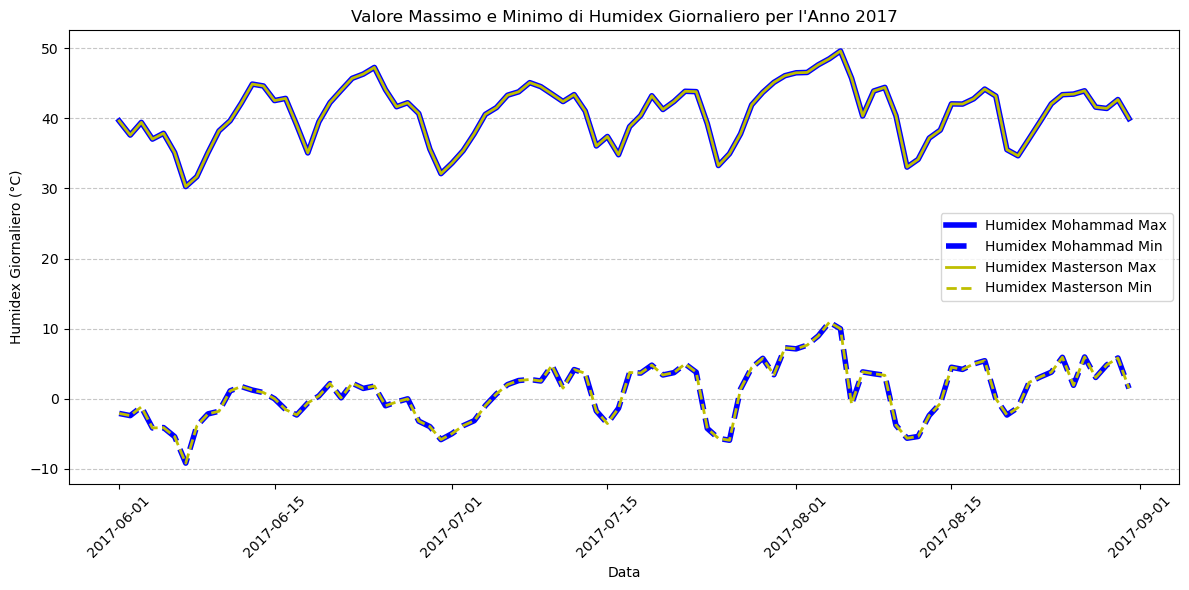

In [67]:
# Filtra entrambi i dataset per un anno specifico, ad esempio 2017
year = 2017
temperature_ds = dataset2['T_2M'].sel(time=dataset2['T_2M'].time.dt.year == year, drop=True)
dew_point_ds = dataset1['TD_2M'].sel(time=dataset1['TD_2M'].time.dt.year == year, drop=True)

# Verifica che entrambi abbiano gli stessi timestamp
if not temperature_ds.time.equals(dew_point_ds.time):
    raise ValueError("I timestamp dei due dataset non coincidono per l'anno selezionato!")

# Sostituisci i valori di dew point non credibili con la media dei valori limitrofi tramite interpolazione lineare
dew_point_ds_filtered = dew_point_ds.where(dew_point_ds > 243.15)  # Dew point non credibili < -30°C
dew_point_ds_interpolated = dew_point_ds_filtered.interpolate_na(dim='time', method='linear')

# Calcola l'Humidex secondo la formula Mohammad
humidex_mohammad = temperature_ds + 3.394444 * np.exp(19.833625 - (5417.7530 / dew_point_ds_interpolated)) - 5.555556

# Calcola l'Humidex secondo la formula Masterson
humidex_masterson = temperature_ds + 0.5555 * (6.11 * np.exp(5417.7530 * ((1/273.16) - (1/dew_point_ds_interpolated))) - 10)

# Calcola il valore massimo e minimo dell'Humidex per ciascun giorno
humidex_mohammad_daily_max = humidex_mohammad.resample(time='1D').max(dim=['time', 'rlat', 'rlon'])
humidex_mohammad_daily_min = humidex_mohammad.resample(time='1D').min(dim=['time', 'rlat', 'rlon'])

humidex_masterson_daily_max = humidex_masterson.resample(time='1D').max(dim=['time', 'rlat', 'rlon'])
humidex_masterson_daily_min = humidex_masterson.resample(time='1D').min(dim=['time', 'rlat', 'rlon'])

# Converte l'Humidex in gradi Celsius per visualizzare i risultati
humidex_mohammad_daily_max_celsius = humidex_mohammad_daily_max - 273.15
humidex_mohammad_daily_min_celsius = humidex_mohammad_daily_min - 273.15

humidex_masterson_daily_max_celsius = humidex_masterson_daily_max - 273.15
humidex_masterson_daily_min_celsius = humidex_masterson_daily_min - 273.15

# Converte il risultato in un DataFrame per una più semplice visualizzazione
humidex_df = pd.DataFrame({
    'time': humidex_mohammad_daily_max_celsius.time.values,
    'humidex_mohammad_max': humidex_mohammad_daily_max_celsius.values,
    'humidex_mohammad_min': humidex_mohammad_daily_min_celsius.values,
    'humidex_masterson_max': humidex_masterson_daily_max_celsius.values,
    'humidex_masterson_min': humidex_masterson_daily_min_celsius.values
})

# Stampa i risultati
print("Valori massimi e minimi di Humidex (°C) per ciascun giorno dell'anno:")
print(humidex_df)

# Crea un grafico a linee per visualizzare i valori massimi e minimi di Humidex giornalieri
plt.figure(figsize=(12, 6))
plt.plot(humidex_df['time'], humidex_df['humidex_mohammad_max'], linestyle='-', color='b', linewidth=4, label='Humidex Mohammad Max')
plt.plot(humidex_df['time'], humidex_df['humidex_mohammad_min'], linestyle='--', color='b', linewidth=4, label='Humidex Mohammad Min')
plt.plot(humidex_df['time'], humidex_df['humidex_masterson_max'], linestyle='-', color='y', linewidth=2, label='Humidex Masterson Max')
plt.plot(humidex_df['time'], humidex_df['humidex_masterson_min'], linestyle='--', color='y', linewidth=2, label='Humidex Masterson Min')
plt.xlabel("Data")
plt.ylabel("Humidex Giornaliero (°C)")
plt.title(f"Valore Massimo e Minimo di Humidex Giornaliero per l'Anno {year}")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Calcola la media spaziale per ogni timestamp lungo le dimensioni 'rlat' e 'rlon'
temperature_mean_over_space = (dataset1['TD_2M'].max(dim=['rlat', 'rlon'])) - 273.15
results_df = pd.DataFrame(temperature_mean_over_space)
print(results_d)

               0
0      18.541077
1      18.485870
2      19.313110
3      18.572327
4      20.092041
...          ...
23731  15.484131
23732  15.599060
23733  15.824707
23734  16.030182
23735  17.025726

[23736 rows x 1 columns]


In [6]:
# **Crea una lista di tutti gli anni disponibili nei dataset**
years = np.unique(dataset2['T_2M'].time.dt.year.values)

# **Inizializza una lista per contenere i risultati**
results = []

# **Itera su ciascun anno per trovare i giorni con Humidex massimo e Temperatura massima**
for year in years:

    # **Filtra i dataset per l'anno corrente**
    temperature_ds = dataset2['T_2M'].sel(time=dataset2['T_2M'].time.dt.year == year)  # In Kelvin
    dew_point_ds = dataset1['TD_2M'].sel(time=dataset1['TD_2M'].time.dt.year == year)  # In Kelvin

    # **Verifica che entrambi abbiano gli stessi timestamp**
    if not temperature_ds.time.equals(dew_point_ds.time):
        raise ValueError(f"I timestamp dei due dataset non coincidono per l'anno {year}!")

    # **Filtra valori anomali e interpoliamo dew point temperature**
    dew_point_filtered = dew_point_ds.where(dew_point_ds > 243.15)
    dew_point_interpolated = dew_point_filtered.interpolate_na(dim='time', method='linear')

    # **Calcola l'Humidex per ciascun timestamp e media spazialmente (in Kelvin)**
    humidex = temperature_ds + 3.394444 * np.exp(19.833625 - (5417.7530 / dew_point_interpolated)) - 5.555556

    # **Riduci lungo le coordinate spaziali per ottenere il massimo temporale**
    humidex_max_per_time = humidex.max(dim=['rlat', 'rlon'])
    temperature_max_per_time = temperature_ds.max(dim=['rlat', 'rlon'])

    # **Trova il valore massimo e l'orario corrispondente per Humidex**
    max_humidex_value = humidex_max_per_time.max()
    max_humidex_time = humidex_max_per_time.time.where(humidex_max_per_time == max_humidex_value, drop=True).values[0]
    max_humidex_timestamp = int(np.where(dataset2['T_2M'].time.values == max_humidex_time)[0][0])

    # **Trova il valore massimo e l'orario corrispondente per Temperatura**
    max_temperature_value = temperature_max_per_time.max()
    max_temperature_time = temperature_max_per_time.time.where(temperature_max_per_time == max_temperature_value, drop=True).values[0]
    max_temperature_timestamp = int(np.where(dataset2['T_2M'].time.values == max_temperature_time)[0][0])

    # **Determina se le date e gli orari coincidono**
    same_day = "Yes" if str(max_humidex_time)[:10] == str(max_temperature_time)[:10] else "-"
    same_time = "Yes" if str(max_humidex_time)[11:16] == str(max_temperature_time)[11:16] else "-"

    # **Aggiungi i risultati alla lista**
    results.append({
        'year': year,
        'date_h_max': str(max_humidex_time)[:10],
        'time_h_max': str(max_humidex_time)[11:16],
        'humidex_max': max_humidex_value.values - 273.15,
        'timestamp_h_max': max_humidex_timestamp,  # Aggiunto il numero di timestamp
        'date_t_max': str(max_temperature_time)[:10],
        'time_t_max': str(max_temperature_time)[11:16],
        'temperature_max': max_temperature_value.values - 273.15,
        'timestamp_t_max': max_temperature_timestamp,  # Aggiunto il numero di timestamp
        'same_day': same_day,
        'same_time': same_time
    })

# **Converte i risultati in un DataFrame per una più facile visualizzazione**
results_df = pd.DataFrame(results)

# **Stampa i risultati**
print("\n=== Giorni con Humidex e Temperatura massimi per ciascun anno ===")
results_df


=== Giorni con Humidex e Temperatura massimi per ciascun anno ===


,year,date_h_max,time_h_max,humidex_max,timestamp_h_max,date_t_max,time_t_max,temperature_max,timestamp_t_max,same_day,same_time
0,1981,1981-08-03,15:00,44.455713,382,1981-08-03,15:00,41.231866,382,Yes,Yes
1,1982,1982-07-06,15:00,45.760675,766,1982-07-06,15:00,43.462946,766,Yes,Yes
2,1983,1983-07-26,14:00,47.004938,1437,1983-07-28,14:00,46.184869,1449,-,Yes
3,1984,1984-07-12,13:00,44.576532,1904,1984-07-12,14:00,44.041620,1905,Yes,-
4,1985,1985-07-27,15:00,45.170801,2548,1985-07-26,14:00,43.382532,2541,-,-
5,1986,1986-08-02,14:00,44.722833,3135,1986-08-03,14:00,40.924036,3141,-,Yes
6,1987,1987-08-15,14:00,45.193597,3765,1987-08-15,14:00,42.917627,3765,Yes,Yes
7,1988,1988-07-23,13:00,46.828302,4178,1988-08-02,14:00,44.002527,4239,-,-
8,1989,1989-08-17,14:00,45.508966,4881,1989-08-16,14:00,41.076990,4875,-,Yes
9,1990,1990-07-23,14:00,43.838647,5283,1990-07-22,15:00,42.621820,5278,-,-


#### Livelli di pericolosità Humidex

Humidex (°C)|Livello di disagio/pericolo|
|:--|:--|
|< 2|Nessun disagio apparente|
|30 - 39|Disagio lieve/moderato|
|40 - 45|Disagio forte, attenzione consigliata|
|> 45|Pericoloso: rischio di colpi di calore|
|> 54|Condizioni molto pericolose, rischio estremo di colpo di calore|

In [64]:
# Creazione della tabella con il conteggio di Humidex per fasce di pericolosità
humidex_counts = []

for year in years:
    # Filtra i dataset per l'anno corrente e solo per i mesi estivi (giugno-settembre)
    temperature_ds = dataset2['T_2M'].sel(time=dataset2['T_2M'].time.dt.year == year, drop=True)
    dew_point_ds = dataset1['TD_2M'].sel(time=dataset1['TD_2M'].time.dt.year == year, drop=True)
    
    # Verifica che entrambi abbiano gli stessi timestamp
    if not temperature_ds.time.equals(dew_point_ds.time):
        raise ValueError(f"I timestamp dei due dataset non coincidono per l'anno {year}!")
    
    # Sostituisci i valori di dew point non credibili con interpolazione lineare
    dew_point_ds_filtered = dew_point_ds.where(dew_point_ds > 243.15)
    dew_point_ds_interpolated = dew_point_ds_filtered.interpolate_na(dim='time', method='linear')
    
    # Calcola l'Humidex per ciascun timestamp
    humidex = temperature_ds + 3.394444 * np.exp(19.833625 - (5417.7530 / dew_point_ds_interpolated)) - 5.555556
    
    # Calcola il valore massimo dell'Humidex per ciascun giorno nei mesi estivi
    humidex_daily_max = humidex.sel(time=humidex.time.dt.month.isin([6, 7, 8, 9])).resample(time='1D').max()
    
    # Assicura che humidex_daily_max abbia un solo valore per ogni giorno
    humidex_daily_max = humidex_daily_max.compute()
    
    # Inizializza i contatori
    count_safe = 0
    count_moderate = 0
    count_high = 0
    count_danger = 0
    count_extreme = 0
    total_days = 0
    
    # Itera su ciascun giorno e classifica il valore massimo dell'Humidex
    for day in humidex_daily_max.time.values:
        humidex_day_values = humidex_daily_max.sel(time=day).values
        if isinstance(humidex_day_values, np.ndarray):
            humidex_max = humidex_day_values.max() - 273.15  # Converti in gradi Celsius
        else:
            humidex_max = humidex_day_values - 273.15
        
        if humidex_max < 30:
            count_safe += 1
        elif 30 <= humidex_max < 40:
            count_moderate += 1
        elif 40 <= humidex_max < 45:
            count_high += 1
        elif 45 <= humidex_max < 54:
            count_danger += 1
        else:
            count_extreme += 1
        
        total_days += 1
    
    # Aggiungi i risultati per l'anno corrente
    humidex_counts.append({
        'year': year,
        '<30 (Sicuro)': count_safe,
        '30-39 (Moderato)': count_moderate,
        '40-44 (Alto)': count_high,
        '45-54 (Pericoloso)': count_danger,
        '>=54 (Estremo)': count_extreme,
        'Total Days': total_days
    })

# Converte i risultati in un DataFrame per una più facile visualizzazione
humidex_summary_df = pd.DataFrame(humidex_counts)

# Stampa la tabella dei conteggi
print("Distribuzione dei massimi raggiunti per ciascun giorno del dataset e per ciascun anno all'interno dei livelli di Humidex nei mesi estivi:")
humidex_summary_df

Distribuzione dei massimi raggiunti per ciascun giorno del dataset e per ciascun annomall'interno dei livelli di Humidex nei mesi estivi:


,year,<30 (Sicuro),30-39 (Moderato),40-44 (Alto),45-54 (Pericoloso),>=54 (Estremo),Total Days
0,1981,8,65,19,0,0,92
1,1982,2,53,36,1,0,92
2,1983,5,58,18,11,0,92
3,1984,6,68,18,0,0,92
4,1985,9,54,27,2,0,92
5,1986,12,48,32,0,0,92
6,1987,9,54,28,1,0,92
7,1988,6,52,31,3,0,92
8,1989,14,47,30,1,0,92
9,1990,2,60,30,0,0,92


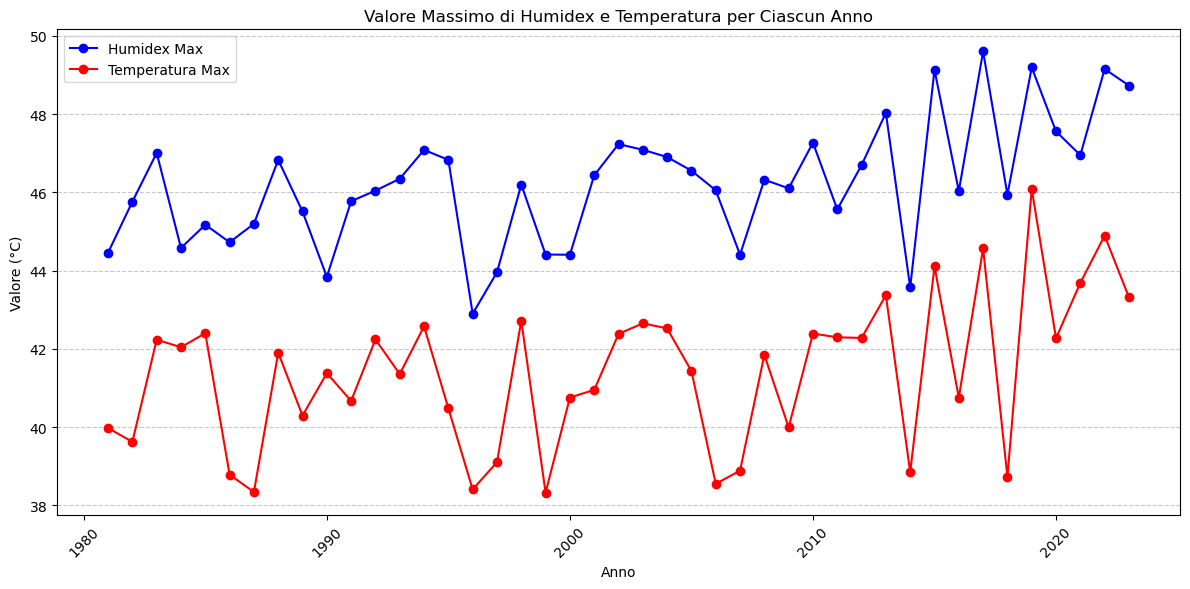

In [49]:
# Crea un grafico a linee per visualizzare i valori massimi di Humidex e Temperatura per ciascun anno
plt.figure(figsize=(12, 6))
plt.plot(results_df['year'], results_df['humidex_max'], linestyle='-', color='b', marker='o', label='Humidex Max')
plt.plot(results_df['year'], results_df['temperature_max'], linestyle='-', color='r', marker='o', label='Temperatura Max')
plt.xlabel("Anno")
plt.ylabel("Valore (°C)")
plt.title("Valore Massimo di Humidex e Temperatura per Ciascun Anno")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Ruota le etichette degli anni sull'asse x per renderle più leggibili
plt.tight_layout()
plt.show()


#### 01.7 - Rough inital data spatialization

In [117]:
# Visualizza l'Humidex su mappa per un anno specifico
year_to_plot = 1983
max_humidex_day_to_plot = results_df[results_df['year'] == year_to_plot]['date'].values[0]

# Filtra i dataset per il giorno con Humidex massimo
temperature_day = dataset2['T_2M'].sel(time=max_humidex_day_to_plot) - 273.15  # In Celsius
dew_point_day = dataset1['TD_2M'].sel(time=max_humidex_day_to_plot) - 273.15  # In Celsius
humidex_day = temperature_day + 3.394444 * np.exp(19.833625 - (5417.7530 / (dew_point_day + 273.15))) - 5.555556

# Crea una mappa centrata su Milano
mappa = folium.Map(location=[45.45, 9.15], zoom_start=8)

# Crea un GeoDataFrame che rappresenta le celle dei dati di Humidex
celle = []
for rlat in humidex_day['rlat'].values:
    for rlon in humidex_day['rlon'].values:
        lat = humidex_day['lat'].sel(rlat=rlat, method='nearest').values
        lon = humidex_day['lon'].sel(rlon=rlon, method='nearest').values
        value = humidex_day.sel(rlat=rlat, rlon=rlon).values
        if not np.isnan(value):  # Controlla se il valore non è NaN
            delta = 0.1  # Estensione della cella (modificabile in base alla risoluzione dei dati)
            polygon = Polygon([
                (lon - delta, lat - delta),
                (lon - delta, lat + delta),
                (lon + delta, lat + delta),
                (lon + delta, lat - delta)
            ])
            celle.append({'geometry': polygon, 'humidex': value})

# Crea un GeoDataFrame con tutte le celle
gdf = gpd.GeoDataFrame(celle)

# Normalizza i valori di Humidex per la colorazione
norm = plt.Normalize(vmin=gdf['humidex'].min(), vmax=gdf['humidex'].max())
cmap = plt.get_cmap('viridis')

# Aggiungi le celle alla mappa come poligoni
for _, row in gdf.iterrows():
    color = mcolors.to_hex(cmap(norm(row['humidex'])))
    folium.Polygon(
        locations=[(coord[1], coord[0]) for coord in row['geometry'].exterior.coords],
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.5,
        weight=0
    ).add_to(mappa)

# Mostra la mappa
mappa

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()